<a href="https://colab.research.google.com/github/ctarrington/data-science-hw/blob/master/dsp-practical-guide/ch05/discrete_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import math

from matplotlib.pyplot import plot
from matplotlib import pyplot as plt

In [30]:
def input_side_convolve(x, h):
  size = len(x) + len(h) - 1
  y = [0] * size


  for x_index in range(len(x)):
    for h_index in range(len(h)):
      y_index = x_index + h_index
      y[y_index] = y[y_index] + x[x_index] * h[h_index]

  return y

def output_side_convolve(x, h):
  size = len(x) + len(h) - 1
  y = [0] * size

  for y_index in range(size):
    for h_index in range(len(h)):
      if y_index - h_index < 0 or y_index - h_index >= len(x):
        continue

      y[y_index] = y[y_index] + h[h_index] * x[y_index - h_index]

  return y

def plot_convolution(x, h, y):
  fig, (x_plot, h_plot, xh_plot) = plt.subplots(1,3, gridspec_kw={'width_ratios': [3, 1, 4]}, figsize=(15, 5), sharey='row')
  x_plot.plot(x, 'o')
  x_plot.grid(axis='both')
  x_plot.set_title('x')
  
  h_plot.plot(h, 'o')
  h_plot.grid(axis='both')
  h_plot.set_title('h')
  
  xh_plot.plot(y, 'o')
  xh_plot.grid(axis='both')
  xh_plot.set_title('x*h')


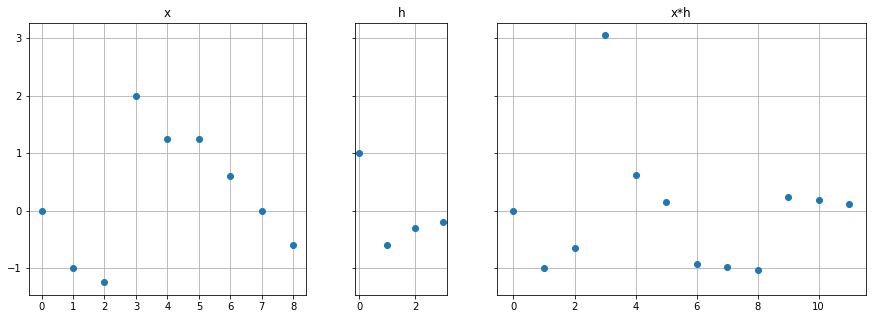

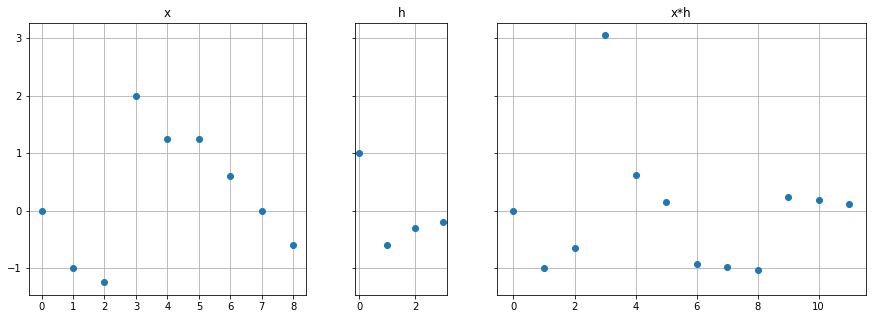

In [31]:
x = [0, -1, -1.25, 2, 1.25, 1.25, 0.6, 0, -.6]
h = [1, -0.6, -0.3, -0.2]
y = input_side_convolve(x, h)
plot_convolution(x, h, y)

y = output_side_convolve(x, h)
plot_convolution(x, h, y)


Look derivatives with convolution


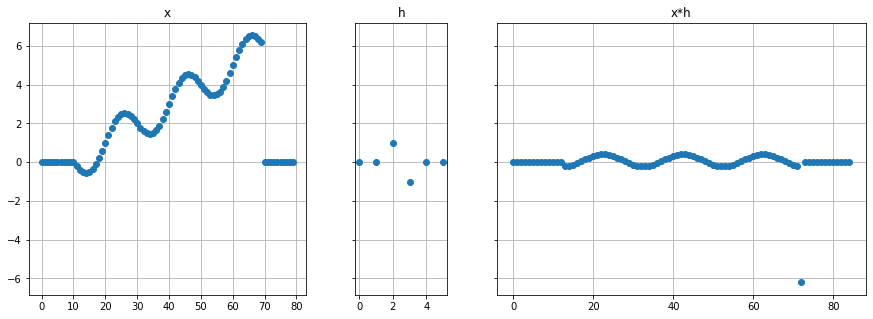

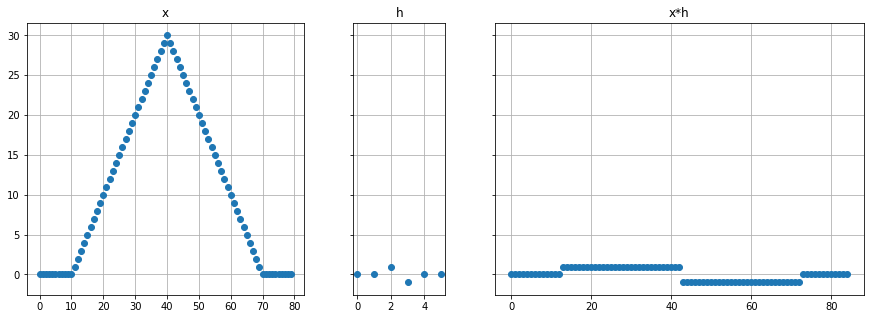

In [36]:
x = [0] * 80
for index in range(10, 70):
  x[index] = math.sin(index*math.pi/10) + index/10 - 1

first_difference = [0] * 6
first_difference[2] = 1
first_difference[3] = -1

print('Look derivatives with convolution')

y = input_side_convolve(x, first_difference)
plot_convolution(x, first_difference, y)

x = [0] * 80
for index in range(10, 40):
  x[index] = index - 10

for index in range(40, 70):
  x[index] = 70 - index

y = input_side_convolve(x, first_difference)
plot_convolution(x, first_difference, y)